<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [151]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [152]:
# A:
D = {'X' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Y':[.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [153]:
# A:
pre_df = pd.DataFrame.from_dict(D)

### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [154]:
# A:
lst_X = list([i + 10 for i in pre_df.X])
lst_Y = list([i + 3 for i in pre_df.Y])
new_data = pd.DataFrame(zip(lst_one, lst_two), columns = ['X', 'Y'])

In [155]:
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [156]:
# A:
df = pd.DataFrame(pd.concat([pre_df, new_data], axis = 0))

In [157]:
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

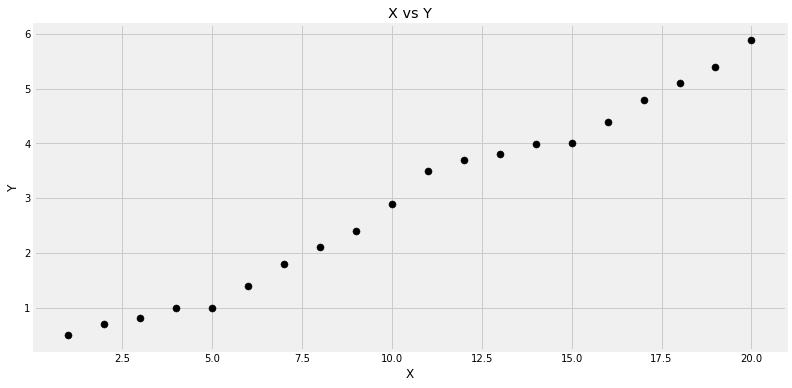

In [158]:
# A:
df.plot(kind = 'scatter' , x = 'X', y = 'Y', title = 'X vs Y' ,figsize = (12,6), s = 50, c = 'black');

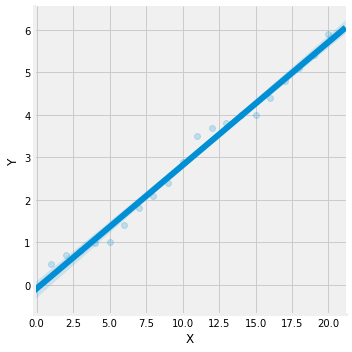

In [159]:
sns.lmplot(x='X', y='Y', data=df, scatter_kws={'alpha':0.2});

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [160]:
# A:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
feature = ['X']
X = df[feature]
y = df.Y
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [161]:
lr.score(X,y)

0.9860390205423032

### What is the p-value for your X?

In [39]:
# A:


### What is the intercept?

In [162]:
# A:
print(lr.intercept_)
print(lr.coef_)

-0.08568421052631647
[0.28996992]


### Using the above, write the equation for our model

In [11]:
# A: 
'''y = .289*x + -.0856'''

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [12]:
# A:
20 = 5.7135
21 = 6.0035

In [13]:
# A:

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [63]:
# A:
new = [[20],[21]]
lr.predict(new)

array([5.71371429, 6.00368421])

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [163]:
# A:
y_hats = []
for i in range(1,21):
    hat = lr.predict([[i]])
    y_hats.append(float(hat))

errors = y_hats - df.Y
errors = errors**2
SSE = sum(errors)

In [165]:
SSE

0.7916793984962405

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [167]:
# A:
df2 = df.copy()
df2['Preds'] = y_hats

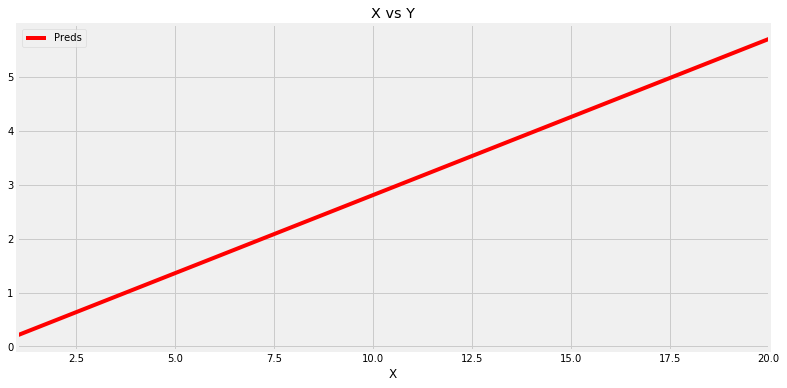

In [173]:
df2.plot(kind = 'line' , x = 'X', y = 'Preds', title = 'X vs Y' ,figsize = (12,6), c = 'red')

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [89]:
# A:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_feats = poly.fit_transform(X)
poly_X = pd.DataFrame(poly_feats)
merged = pd.merge(poly_X, df['Y'], on = poly_X.index)

### Using statsmodels as before, fit this new model and save it as poly_results

In [194]:
# A:
features = [0,1,2,3,4,5]
X = merged[features]
y = merged.Y
poly_results= lr.fit(X,y)

### Print out the model's predictions and save them as poly_yhat

In [196]:
# A:
poly_yhat = np.array(poly_results)

In [200]:
print(lr.intercept_)
print(lr.coef_)

0.5701904024827784
[ 0.00000000e+00 -1.04243877e-02  9.91846271e-03  5.35214266e-03
 -5.26771671e-04  1.34716427e-05]


### Calculate the SSE

In [201]:
# A:
poly_y_hats = []
for i in range(1,21):
    hat = lr.predict([[i]])
    y_hats.append(float(hat))

errors = y_hats - df.Y
errors = errors**2
SSE = sum(errors)

ValueError: shapes (1,1) and (6,) not aligned: 1 (dim 1) != 6 (dim 0)

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: